# Object-Oriented Pereceptron API

## Creating Perceptron classifier (for Binary classification)

### Overall Parameters and Attributes

#### Parameters

- eta: float
    - Learning rate (between 0.0 and 1.0)
- n_iter: int
    - Passes over the training dataset. (a.k.a epochs)
- random_state: int
    - Random number generator seed for random weight initialization.

#### Attributes

- w_: 1d-array
    - Weights after fitting.
- errors_: list
    - Number of misclassifications (updates) in each epoch.

### Fit method

#### Parameters

- X: Training vectors, where n_examples is the number of examples and n_features is the number of features.
    - {array-like}
    - shape = [ n_examples, n_features ]
- y: Target values.
    - array-like
    - shape = n_examples

#### Returns

- self: object


In [1]:
import numpy as np

In [2]:
class Perceptron(object):

    def __init__(self, eta = 0.01, n_iter = 50, random_state = 13):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update               #This is the theta, or bias unit (a.k.a. threshold)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        # Calculates net input
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        # Returns class label after unit step
        return np.where(self.net_input(X) >= 0.0, 1, -1)

        

## Importing the Iris dataset directly from the UCI Machine Learning Repository

In [3]:
import os
import pandas as pd 
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
print('URL:', s)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [4]:
df = pd.read_csv(
    s,
    header= None,
    encoding= 'utf-8'
)

print(df.tail())
print(df.iloc[49,4],df.iloc[99,4]) #Checking values are separated

0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica
Iris-setosa Iris-versicolor


In [5]:
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Extracting and Graphing Labels

In [6]:
import matplotlib.pyplot as plt
import numpy as numpy

# Selecting Setosa and Versicolor labels
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extract sepal lenfth and petal length
X = df.iloc[0:100, [0,2]].values #We are only using two features to simplify graphing (this is just practice)

# Plotting data
plt.scatter(
    X[:50, 0],
    X[:50, 1],
    color= 'red',
    marker= 'o',
    label= 'setosa'
)

plt.scatter(
    X[50:100, 0],
    X[50:100, 1],
    color= 'blue',
    marker= 'x',
    label= 'versicolor'
)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc= 'upper left')
plt.show()

<Figure size 640x480 with 1 Axes>

### IMPORTANT NOTE

Please note that in this dataset (and specifically, in this two-dimensional feature subsapce), a linear decision boundary is sufficient to sepearte the two types of flowers we chose to use in this classifier. This makes our perceptron capable of being used since it's a linear classifier.

## Training Perceptron and Graphing Errors

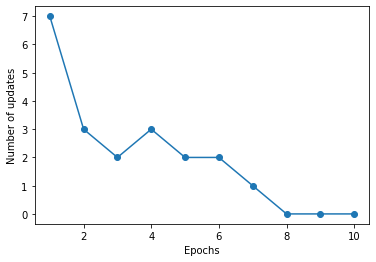

In [25]:
# Creating model
ppn = Perceptron(eta = 0.0001, n_iter = 10)

# Fitting model
ppn.fit(X, y)

# Plotting erros
plt.plot(
    range(1, len(ppn.errors_) + 1),
    ppn.errors_,
    marker= 'o'
)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## Plotting the decision boundaries

In [23]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black'
        )
    

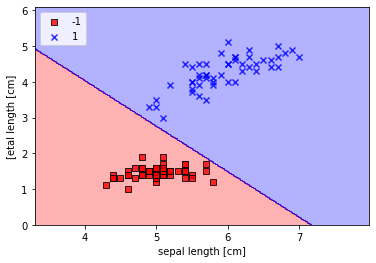

In [26]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('[etal length [cm]')
plt.legend(loc='upper left')
plt.show()